<a href="https://colab.research.google.com/github/OlafWolkenhauer/Modelling-the-corona-pandemic/blob/master/Model_showing_effectiveness_of_aggressive_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The role of aggressive testing and social distancing to avoid a total lockdown

##### Saptarshi Bej, Olaf Wolkenhauer




## Abstract

During the COVID-19 pandemic, numerous mathematical models have been developed. For most models, the focus has been on predicting the peak of new daily cases as this would give an indication of the resources that would be required from a health system. Another use of models is demonstrate the effect of counter measures, like social distancing. World wide, the reporting of new infections has suffered from uncertainty due to reporting practices, and a lack of systematic and widespead testing. This has provided a major challenge for real-time predictions of case numbers and predicted peak time points.

Reporting artefacts, and the sensitivity of SEIR type models to changes in parameter values, suggests that models focussing on general pattern and relative changes in the shape of curves is a more promising approach. The analyis we present here, is in the spirit of the analysis by [Uri Alon](https://medium.com/@urialonw/adaptive-cyclic-exit-strategies-from-lockdown-to-suppress-covid-19-and-allow-economic-activity-4900a86b37c7), who investigated exit strategies. The aim of such models is not an accurate prediction of case numbers in a particular population. The purpose is to predict consequences and pattern emerging from different measures, implemented to control the pandemic. 

Our model is specifically focused on demonstrating the effectiveness of testing, in combination with social distancing. Using ordinary differential equations, the model will distinguish between four groups of (i) People who are 'Susceptible', who can still become infected; (ii) 'Unidentified' spreaders, that is, people who can spread the infection but have not been tested to be COVID positive yet; (iii) 'Identified' spreaders ,that is, people who can spread the infection and have been tested to be COVID positive; and (iv) Resolved cases, including deaths and recovery. 

We are particularly interested in "aggressive" testing, that is, testing individuals even without symptoms. To this end, we have produced a Python-based Jupyter Notebook, allowing for an interactive visualisation of scenarios that compare different implementations of testing and social distancing policies.

Since both, a total lockdown and aggressive testing will be difficult to achieve, especially in the early phase of a pandemic. Our analysis suggests however that with aggressive testing and strict isolation of identified spreaders, it is possible to achieve control of the pandemic without a total lockdown.


## Using this Jupyter Notebook

This document is a Jupyter Notebook, containing text and Python code. Opened in [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb), the code and interactive simulations can be run inside a browser, without the need to install any third-party programs, or Python. Cells with code can be executed by clicking on the top left of the box. All cells in the notebook can be run together from the "runtime" menu. For the interactive simulation, there is one Python function (configure_plotly_browser_state) that is specific to running this notebook in Google Colab. If this notebook is used in JupyterLab, the function and the calling of this function needs to be removed.

### Loading Python libraries

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

### Functions unrelated to the analysis

In [0]:
def configure_plotly_browser_state():
  # This function is only required for interactive simulations in Google Colab.
  # If this notebook is opened in JupyterLab, this function and the line below that calls it, should be removed.
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

## Compartmental SUIR Modelling
The model we explore here investigates the effect of testing.  We interpret "aggressive" testing to be testing individuals even without symptoms (not waiting for symptoms to perform a test). Aggressive testing may consider the following scenarious:

- Random testing of individuals (for example, walk-in testing stations installed in South Korea)
- Strategic testing such as testing of all persons who have been in contact with some identified patient 
- Testing of all persons in identified 'hotspots' of the disease

We assume that the health system is economically and socially capable of organizing an aggressive testing scenario. In such a case, as opposed to the SEIR model, one does not need to consider the the compartment E of exposed individuals, because aggressive testing is done irrespective of the fact whether a person in susceptible, exposed, infected.

The construction of our model is a simplified version of a model proposed by [Singh and Adhikary](https://arxiv.org/pdf/2003.12055.pdf). We interpret the model slightly differently to investigate the importance of aggressive testing in controlling the pandemic. We consider the following subpopulations ("compartments"):




- $S$: Susceptible; People who can still become infected

- $U$: Unidentified spreaders;  People who can spread the infection and have not been tested to be COVID positive yet

- $I$: Identified spreaders; People who can spread the infection and have been tested to be COVID positive

- $R$: Resolved; Resolved cases (deaths+recovery)


Note that, we use the notion of Unidentified spreaders and Identified spreaders in this model since the Unidentified spreaders have a large role in spreading the disease. We usually do not know the actual number of infections. So, we do not consider the Infection compartment as usually done in classical SEIR model. Rather we defined the compartment as 'Identified spreaders', a variable that can be reliably evaluated, simply because the primary data usually available publicly is the number of cases appearing each day. Note that, these numbers do not represent the total number of infections or total number of spreaders, but only the number of persons who have been tested COVID-19. The reported number of COVID-19 cases is  also highly dependant on the degree of testing performed by a medical system. This model considers a parameter quantifying the probabiltiy of a disease spreader to be identified. In a practical scenario, this probability is likely to be high when there is aggressive testing. Moreover, it considers parameters accounting for social isolation assuming that, an indentified spreader would be rigorously quarentined and would thus contribute significantly less in spreading the epidemic.


## Construction of the model

Let $S(t)$ count how many individuals are susceptible at time $t$. This subpopulation is at risk of becoming infected.

Assuming that most people are not isolated, they can get infected. The initial condition for $S$ would thus be approximately $N-U(0)-I(0)-R(0)$, where $N$ is the size of the population at risk of contracting the virus. 

The subpopulation $U(t)$ at time $t$ are unidentified spreaders - people who can spread the infection and have not been tested to be COVID positive yet.

Any increase to $U$, implies an equal decrease of $S$. Any term that adds to the equation for $U$, will be mirrored by the same term with a minus in front in the equation for $S$. 

The subpopulation of identified spreaders at time $t$ is denoted $I(t)$. The individuals have been tested positive, and can spread the disease. Once tested positive, one can assume that these person will be isolated reasonably well. This means the contribution of this subpopulation to the decrease of $S$ should be small, compared to the contribution from $U$. We shall denote these contributions of $U$ and $I$ to the decrease of $S$ with $\kappa_I$  and $\kappa_U$. 

We refer to $\kappa_I$ as the **Isolation Index**, defining the effectiveness of isolating identified spreaders. A low value of $\kappa_I$ refers to good quarantering, through strict isolation of identified spreaders.

The **Social Distancing Index** $\kappa_U$ defines the contribution of unidentified spreaders on the infection of susceptibles. If measures, like social distancing are implemented, their effectiveness would be reflected by $\kappa_U$. A low value of  $\kappa_U$, refers to strict social distancing as would happen during a lockdown.

One would then expect that $\kappa_U \gg \kappa_I$

Any increase of identified spreaders $I$, implies an equal decrease of $S$. Any term that adds to the equation for $I$, will be mirrored by the same term with a minus in front in the equation for $S$.

Finally, we combine death and recoveries in the subpopulation denoted by $R(t)$. Considering subpopulations $S$, $U$, $I$, and $R$, we may refer to our model as a SUIR model. Models, where individuals move from one subpopulation “compartment”) to another, are also referred to as ‘compartmental models’. Most classical epidemiological models include $E$ for an exposed group, which means that our model slightly deviates from standard models. We deliberatly avoided a larger model with more variables. The current coronavirus pandemic has revealed various problems with data generated. The larger the size of the model, the greater the risk of making it unidentifiable. The predictions arising from SEIR type epidemiological models also tend to be sensitive to changes in parameter values. Taken together, during the current crisis numerical predictions of case numbers and specific times (e.g. of peaks) has been difficult. As a consequence, we here focus on a simple model that does not try to focus on values and time points. Instead, the goal is to investigate general pattern and scenarious. An example of such type of modelling that we pursue here is the model by [Uri Alon](https://medium.com/@urialonw/adaptive-cyclic-exit-strategies-from-lockdown-to-suppress-covid-19-and-allow-economic-activity-4900a86b37c7). 



### Building the equations

Denoting by $t$ time in days, the model that looks at daily changes, where $\Delta t$=1, would be represented by difference equations. In epidemiological modelling it is however common to assume  $\Delta t$ to go to zero, so that the model is formulated in terms of differential equations. To then simulate the differential equation model, one introduces a uniform mesh in the, $t_n=n\Delta t$, $n=0,\ldots,N_t$, and seek $S$ at the mesh points. The numerical approximation of $S$ at time $t_n$ is denoted by $S^n$.

In the time interval $\Delta t$ some people will be infected, so $S$ will decrease. Both, $I$ and $U$ contribute to this decrease: 
$$
S^{n+1} = S^n - \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t
$$ 

From what we said above, the equation for $I^{n+1}$ and $U^{n+1}$ will automatically receive the term 
$$
+\beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t
$$

The parameter $\beta$ reflects how easily people get infected during a time interval of unit length. This is also referred to as the "transmission rate". 

Suppose that during a time interval $T$ we measure that $x$ actual pairwise meetings do occur among $y$ theoretically possible pairings of people from the $S$, $U$ and $I$ subpopulations. The probability that people meet in pairs during time $T$ is, estimated as a relative frequency, $y/x$. From such a statistic we want the probability per unit time, $\mu=x/(yT)$. 

Given the probability $\mu$, the expected number of meetings per time interval of $(\kappa_I  I^n + \kappa_U  U^n) S^n$ possible pairs of people is $\mu ( \kappa_I  I^n + \kappa_U  U^n) S^n$. During a time interval $\Delta t$, there will be $\mu (\kappa_I  I^n + \kappa_U  U^n) S^n \Delta t$ expected number of meetings between susceptibeles, with identified and unidentified people.

Only a fraction of the $\mu (\kappa_I  I^n + \kappa_U  U^n) S^n \Delta t$ meetings are effective in transmitting the virus. Counting that $m$ people get infected in $n$ such pairwise encounters (e.g. 5 are infected in 1000 encounters), we can estimate the probability of being infected as $p=x/y$. The expected number of individuals in the $S$ subpopulation of susceptibles  that in time interval $\Delta t$ catch the virus and get infected is then 
$$
p \mu (\kappa_I  I^n + \kappa_U  U^n) S^n \Delta t
$$

Next, describing the evolution of $I(t)$, we have from the equation of $S$ already one term,
$$
I^{n+1} = I^n + \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t
$$ 

However, there will also be people that either recover, or die, giving us
$$
I^{n+1} = I^n + \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma I^n \Delta t
$$

Introducing testing, there will be a proportion $\rho$ and $\epsilon$ of indiviuals identified by 'aggressive testing' of people without symptoms and testing due to the manifestation of symptoms, respectively. This proportion will move to subpopulation $I$. The rest of them moves to compartment $U$. This gives us for $I^{n+1}$,
$$
I^{n+1} = I^n + (\rho + \epsilon) \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma I^n \Delta t
$$

The equation for $U^{n+1}$, can now be constructed from the symmetry that must be there from the other equations:
$$
U^{n+1} = U^n + (1-\rho - \epsilon) \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma U^n \Delta t
$$

Changes in the subpopulation $R$ will simply be determined by
$$ 
R^{n+1} = R^n + \gamma ( I^n + U^n ) \Delta t
$$

To summarise, we the model is constructed from the following difference equations:

- $S^{n+1} = S^n - \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t$ 

- $U^{n+1} = U^n + (1-\rho - \epsilon) \beta \left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma U^n \Delta t$

- $I^{n+1} = I^n + (\rho + \epsilon) \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma I^n \Delta t$

- $ R^{n+1} = R^n + \gamma ( I^n + U^n ) \Delta t$



Subtracting the $S^n$, $U^n$, $I^n$, $R^n$ on both sides, and dividing by $\Delta t$, gives us the discretitzed version of differential equations, using the Forward Euler method for $n$=0, ..., $N_t$, over some finite interval $[0,T]$. The corresponding ordinary differential equations are:

- $S' = - \beta\left(\kappa_I  I + \kappa_U  U\right) S$ 

- $U' = (1-\rho - \epsilon) \beta\left(\kappa_I  I + \kappa_U  U\right)  - \gamma U $

- $I' = (\rho + \epsilon) \beta\left(\kappa_I  I + \kappa_U  U\right) S - \gamma I$

- $R' = \gamma ( I + U )$



### Estimating parameter values

The parameter $\beta$ reflects how easily people get infected during a time interval of unit length. This is also referred to as the "transmission rate". 

During a pandemic, the value for $\beta$ bas to be estimated. There will be no hard figures supporting knowledge of $\beta$. However, while an epipedemic turns into a pandemic, there will be hotspots that can serve other countries as source of information. Take for example, a hotspot, where the virus has already spread, over 30 days. An increase of 10M identified spreaders was found. The inital count of identified spreaders at the beginning of the period was 5M and it is assumed that about half of the spreaders were identified. It was furthermore established that about 3M recovered, or died. 

Furthermore, we shall asume a scenario in which identified in the hotspot were well isolated, ie. $\kappa_I$=0.1, but since this is the first month of the epidemic, there little awareness and therefore social distancing, ie $\kappa_U$=0.9.  

Using 1 day as time unit, we make a rough estimate of the newly infected from the difference equation for $S^{n+30}-S^n$:
$$ 
new \approx \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t
$$
which gives us roughly
$$
\beta = \frac{new}{\left(\kappa_I  I^n + \kappa_U  U^n\right)S^n\Delta t }
$$
In our example, $new$ = 10M, $I^n$=5M, $U^n$=5M (same amount of unidentified spreaders, and 30 days.  

The other parameter for which require an estimate is $\gamma$. Say, if among 10M spreaders, 3M recovered or died in one month, we get $\gamma$=3/(10*30).

The parameter $\epsilon$ can be interpreted as the **inverse of the incubation period** (in days). We estimate this to be around 5 days. The incubation period is the average number of days after which a person shows percievable symptoms and is therefore forced to take a COVID test. $\epsilon$ is thus linked to testing focussing on those with symptoms, and a low $\epsilon$, corresponds to a longer incubation period, which means that more spreaders will be unidentified.

**Aggressive Testing Index** $\rho$ describes the proportion of spreaders identified as COVID +ve. This parameter relates to the aggresiveness of testing. We assume that the more aggressive the testing is, the higher the probability of the detection of a previously unidentified spreader. A low value of $\rho$, corresponds to little aggresive testing, implying more unidentified spreaers. A high value of $\rho$, describes aggressive testing, reducing the number of unidentified spreaders. We shall vary $\rho$ between 0 to 1 with a default value of 0.5.

Finally, we refer to $\gamma$ as the **Recovery Index**.

### Encoding the difference equation, using the Forward Euler Method



Note that for the purpose of our model, the choice of population size and the scale of the y axis are not a concern. We focus here on the shape of the responses.

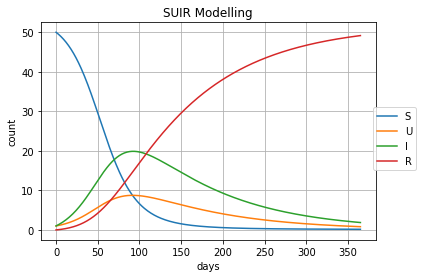

In [0]:
# Time unit: 1 day

kappa_I = 0.1
kappa_U = 0.9
beta = (10)/((kappa_I*5+kappa_U*5)*20*30) 
gamma = 3./(10*30) # Assuming 3M recovered or dead; 10M spreaders, 30 days.
rho = 0.5
epsilon = 0.2

dt = 1              
D = 365             # Simulate for D days
N_t = int(D*1/dt)   # Corresponding no of time steps.

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
U = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)

# Initial conditions
S[0] = 50
I[0] = 1
U[0] = 1 # Assuming about the same amount of unidentified spreaders, as their are identified spreaders.
R[0] = 0

# Step equations forward in time
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*(kappa_I*I[n] + kappa_U*U[n])*S[n]
    U[n+1] = U[n] + dt*(1 - rho - epsilon)*(kappa_I*I[n] + kappa_U*U[n])*beta*S[n] - dt*gamma*U[n]
    I[n+1] = I[n] + dt*(rho + epsilon)*beta*(kappa_I*I[n] + kappa_U*U[n])*S[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*(I[n] + U[n])

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, U, t, I, t, R)
fig.legend((l1, l2, l3, l4), ('S','U', 'I', 'R'), 'center right')
plt.xlabel('days')
plt.ylabel('count')
plt.title('SUIR Modelling')
plt.grid('on')
plt.show()
# plt.savefig('tmp.pdf'); plt.savefig('tmp.png')

## Vectorising the code


A common representation of differential equations is as a vector ODE where $u$ and $f$ are vectors
$$
u'=f(u,t)
$$
For our SUIR model, we have
$$
u = \left(S(t), U(t), I(t), R(t)\right)
$$
and
$$
f(u,t) = \left(- \beta\left(\kappa_I  I + \kappa_U  U\right) S, (1-\rho - \epsilon) \beta\left(\kappa_I  I + \kappa_U  U\right)  - \gamma U ,  (\rho + \epsilon) \beta\left(\kappa_I  I + \kappa_U  U\right) S - \gamma I , \gamma ( I + U )\right)
$$
In Python, the Forward Euler step
$$
u^{n+1}=u^n+\Delta t f\left(u^n,t_n\right)
$$
whether scalar or vector is encoded in the same way: u[n+1] = u[n] + dt * f(u[n], t[n]). 

###  Setting parameter values

In [0]:
# From an increase of 10M identified spreaders, over 30 days,
# Assuming 5M identified and 5M unidentified spreaders; 20M suspectibles.
# beta = (10)/((kappa_I*5+kappa_U*5)*20*30) 
# Assuming 3M recovered or dead; 10M spreaders, 30 days.

kappa_I = 0.1
kappa_U = 0.9
beta = (10)/((kappa_I*5+kappa_U*5)*20*30) 
gamma = 3./(10*30)
rho = 0.5
epsilon = 0.2

params = beta, gamma, rho, kappa_I, kappa_U, epsilon

In [0]:
def ode_FE(f, U_0, dt, T, params):
    """Forward Euler method"""
    N_t = int(round(T/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: np.asarray(f(u, t, params))
    u = np.zeros((N_t+1, len(U_0)))
    t = np.linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t

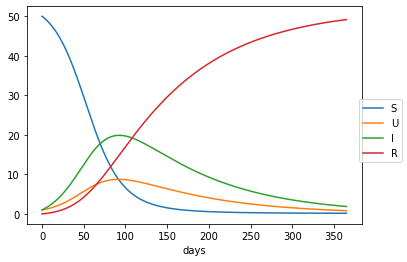

In [0]:
def f(u, t, params):
    """Encoding of the SIUR model"""
    beta, gamma, rho, kappa_I, kappa_U, epsilon = params
    S, U, I, R = u
    return [-beta*(kappa_I*I + kappa_U*U)*S, (1 - rho - epsilon)*(kappa_I*I + kappa_U*U)*beta*S - gamma*U, (rho + epsilon)*beta*(kappa_I*I + kappa_U*U)*S - gamma*I, gamma*(I + U)]

dt = 1              
D = 365             # Simulate for D days
N_t = int(D*1/dt)   # Corresponding no of time steps.

U_0 = [50, 1, 1, 0]

u, t = ode_FE(f, U_0, dt, D, params)

S = u[:, 0]; U = u[:, 1]; I = u[:, 2]; R = u[:, 3]

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, U, t, I, t, R)
fig.legend((l1, l2, l3, l4), ('S','U', 'I', 'R'), 'center right')
plt.xlabel('days')
# plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()


## Interactive Simulations

In [0]:
def plot_simulations(beta, gamma, rho, kappa_I, kappa_U, epsilon, T):
    """Generate plots of simulations"""
    
    params= beta, gamma, rho, kappa_I, kappa_U, epsilon
    u,t = ode_FE(f, U_0, dt, T, params)
    
    S, U, I, R = u[:, 0], u[:, 1],u[:, 2], u[:, 3]
    
    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=t, y=S, mode='markers', name='Susceptible',marker=dict(size=3)))
    fig.add_trace(go.Scatter(x=t, y=U, mode='markers', name='Unidentified spreaders',marker=dict(size=3)))
    fig.add_trace(go.Scatter(x=t, y=I, mode='markers', name='Identified spreaders', marker=dict(size=3)))
    fig.add_trace(go.Scatter(x=t, y=U+I, mode='markers', name='Identified + Unidentified spreaders', marker=dict(size=3)))
    fig.add_trace(go.Scatter(x=t, y=R, mode='markers',name='Recovered',marker=dict(size=3)))
    
    # Edit the layout
    fig.update_layout(title='Simulation of the SUIR model',
                       xaxis_title='Day',
                       yaxis_title='Estimated Counts',
                       title_x=0.5,
                      width=900, height=600
                     )
    fig.update_xaxes(tickangle=-90, tickformat = None, tickmode='array', tickvals=np.arange(0, T, 30))
    if not os.path.exists("images"):
        os.mkdir("images")
    fig.show()


In [0]:
configure_plotly_browser_state()
# Creating an interactive simulation

init_notebook_mode(connected=False)

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(plot_simulations, 
        
        beta = widgets.FloatSlider(min=0, max=.02, step=0.001, value=beta, description='beta'),
        gamma = fixed(gamma),
        rho = widgets.FloatSlider(min=0, max=1, step=0.01, value=rho, description='rho'),
        kappa_I = widgets.FloatSlider(min=0, max=1, step=0.01, value=kappa_I, description='kappa_I'),
        kappa_U = widgets.FloatSlider(min=0, max=1, step=0.01, value=kappa_U, description='kappa_U'),
        epsilon =fixed(.2),
        T = widgets.IntSlider(min=0, max=365*2, step=7, value=365, description='days'),
        );

Let us recapitulate the parameters for the interactive simulation:

| Parameter |Description   | Value range   | Reference |
|-----------|--------------|---------|-----------|
|$\beta$|Effective degree of contageousness|0.003| -
|$\rho$  | Aggressive testing index | [0,1] | -
|$\epsilon$  | Inverse of incubation period | 0.2 | [Backer etal.](https://www.eurosurveillance.org/content/10.2807/1560-7917.ES.2020.25.5.2000062)
|$\gamma$|Recovery index| 0.01|-|
| $\kappa_I$|Social distancing index|[0,1]|-|
| $\kappa_U$|Isolation index|[0,1]|-|



## Exploring practical scenarios

To explore the model with interactive simulations, we suggest changing parameters, looking out for different patterns. Let us here summarise the role of different parameters:

*   **Changing $\beta$** : The $\beta$ value is a parameter for the degree of contageousness of the disease. Higher beta values will increase the number of spreaders (for fixed values of other parameters).

*   **Changing $\rho$** : The parameter $\rho$ corresponds to aggresive testing.  A low value refers to no aggressive testing, ie little testing beyond the people with symptoms. This would imply more unidentified spreaders. Note that there might be several spreaders with minor/negligible symptoms who might not be tested/identified. These spreaders are not rigorously quarentined and have a greater risk of spreading the disease ($\kappa_U \gg \kappa_I$). We argue here that aggressive testing is the only way to increase the probablitiy of the detection of spreaders so they can be rigorously quarentined. Incresing $\rho$ will thus, show us the effect of widespread testing and will reduce the total number of spreaders (for fixed values of other parameters).

*  **Changing $\kappa_I$ and $\kappa_U$** : A low value for the isolation index $\kappa_I$ implies good isolation of identified spreaders (good quaranteing). A low social distancing index $\kappa_U$ corresponds to strict social distancing during a lockdown.

We emphasize that our model is not trying to make accurate predictions about cases numbers at a particular point in time. The focus is on studying general patterns, arising from different scenarios, combining social distancing with testing.

### Scenario 1: Poor isolation of identified spreaders; No social distancing; No aggressive testing

This situation corrsponds to poor quarantering, ie a high $\kappa_I$. No social distancing means  a high value for $\kappa_U$. No aggressive testing implies a low value for $\rho$

In [0]:
# From an increase of 10M identified spreaders, over 30 days,
# Assuming 5M identified and 5M unidentified spreaders; 20M suspectibles.
# beta = (10)/((0.1*5+0.9*5)*20*30) 
# Assuming 3M recovered or dead; 10M spreaders, 30 days.

kappa_I = 0.9
kappa_U = 0.9
beta = (10)/((0.1*5+0.9*5)*20*30) 
gamma = 3./(10*30)
rho = 0.1
epsilon = 0.2

params = beta, gamma, rho, kappa_I, kappa_U, epsilon

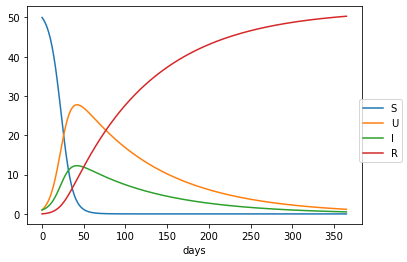

In [0]:
dt = 1              
D = 365             # Simulate for D days
N_t = int(D*1/dt)   # Corresponding no of time steps.

U_0 = [50, 1, 1, 0]

u, t = ode_FE(f, U_0, dt, D, params)

S = u[:, 0]; U = u[:, 1]; I = u[:, 2]; R = u[:, 3]

C_1 = U + I

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, U, t, I, t, R)
fig.legend((l1, l2, l3, l4), ('S','U', 'I', 'R'), 'center right')
plt.xlabel('days')
# plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

### Scenario 2: Good isolation of identified spreaders; No social distancing; High aggressive testing

This situation corrsponds to good quarantering, ie a low $\kappa_I$. No social distancing means  a high value for $\kappa_U$. High aggressive testing implies a high value for $\rho$

In [0]:
# From an increase of 10M identified spreaders, over 30 days,
# Assuming 5M identified and 5M unidentified spreaders; 20M suspectibles.
# beta = (10)/((0.1*5+0.9*5)*20*30) 
# Assuming 3M recovered or dead; 10M spreaders, 30 days.

kappa_I = 0.1
kappa_U = 0.9
beta = (10)/((0.1*5+0.9*5)*20*30) 
gamma = 3./(10*30)
rho = 0.9
epsilon = 0.2

params = beta, gamma, rho, kappa_I, kappa_U, epsilon

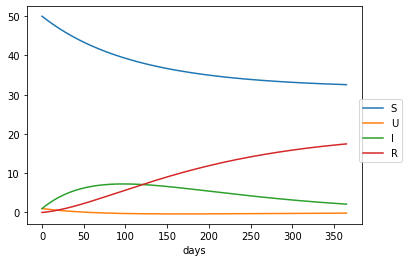

In [0]:
dt = 1              
D = 365             # Simulate for D days
N_t = int(D*1/dt)   # Corresponding no of time steps.

U_0 = [50, 1, 1, 0]

u, t = ode_FE(f, U_0, dt, D, params)

S = u[:, 0]; U = u[:, 1]; I = u[:, 2]; R = u[:, 3]

C_2 = U + I

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, U, t, I, t, R)
fig.legend((l1, l2, l3, l4), ('S','U', 'I', 'R'), 'center right')
plt.xlabel('days')
# plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

### Scenario 3: Good isolation of identified spreaders; Strict social distancing; No aggressive testing

This situation corrsponds to good quarantering, ie a low $\kappa_I$. Strict social distancing means a low value for $\kappa_U$. No aggressive testing implies a high value for $\rho$

In [0]:
# From an increase of 10M identified spreaders, over 30 days,
# Assuming 5M identified and 5M unidentified spreaders; 20M suspectibles.
# beta = (10)/((0.1*5+0.9*5)*20*30) 
# Assuming 3M recovered or dead; 10M spreaders, 30 days.

kappa_I = 0.1
kappa_U = 0.2
beta = (10)/((0.1*5+0.9*5)*20*30) 
gamma = 3./(10*30)
rho = 0.1
epsilon = 0.1

params = beta, gamma, rho, kappa_I, kappa_U, epsilon

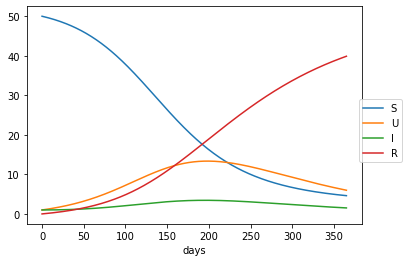

In [0]:
dt = 1              
D = 365             # Simulate for D days
N_t = int(D*1/dt)   # Corresponding no of time steps.

U_0 = [50, 1, 1, 0]

u, t = ode_FE(f, U_0, dt, D, params)

S = u[:, 0]; U = u[:, 1]; I = u[:, 2]; R = u[:, 3]

C_3 = U + I

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, U, t, I, t, R)
fig.legend((l1, l2, l3, l4), ('S','U', 'I', 'R'), 'center right')
plt.xlabel('days')
# plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

### Scenario 4: Good isolation of identified spreaders; Medium social distancing; Aggressive testing

This situation corrsponds to good quarantering, ie a low $\kappa_I$. Medium social distancing means alue for $\kappa_U$ around 0.5. Aggressive testing implies a high value for $\rho$.

In [0]:
# From an increase of 10M identified spreaders, over 30 days,
# Assuming 5M identified and 5M unidentified spreaders; 20M suspectibles.
# beta = (10)/((0.1*5+0.9*5)*20*30) 
# Assuming 3M recovered or dead; 10M spreaders, 30 days.

kappa_I = 0.1
kappa_U = 0.4
beta = (10)/((0.1*5+0.9*5)*20*30) 
gamma = 3./(10*30)
rho = 0.7
epsilon = 0.2

params = beta, gamma, rho, kappa_I, kappa_U, epsilon

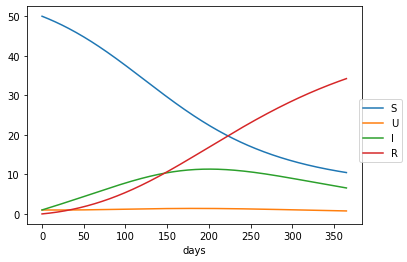

In [0]:
dt = 1              
D = 365             # Simulate for D days
N_t = int(D*1/dt)   # Corresponding no of time steps.

U_0 = [50, 1, 1, 0]

u, t = ode_FE(f, U_0, dt, D, params)

S = u[:, 0]; U = u[:, 1]; I = u[:, 2]; R = u[:, 3]

C_4 = U + I

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, U, t, I, t, R)
fig.legend((l1, l2, l3, l4), ('S','U', 'I', 'R'), 'center right')
plt.xlabel('days')
# plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

### Combining multiple simulation results

The plot below shows for each scenario the temporal evolution of all spreaders, ie the sum of identified and unidentified spreaders.

- Scenario 1: Poor isolation of identified spreaders; No social distancing; No aggressive testing

- Scenario 2: Good isolation of identified spreaders; No social distancing; High aggressive testing

- Scenario 3: Good isolation of identified spreaders; Strict social distancing; No aggressive testing

- Scenario 4: Good isolation of identified spreaders; Medium social distancing; Aggressive testing



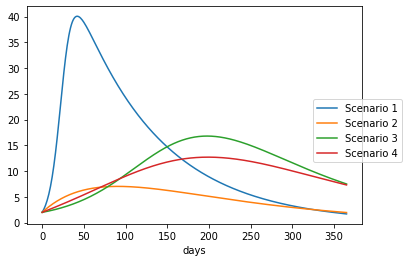

In [0]:
fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, C_1, t, C_2, t, C_3, t, C_4)
fig.legend((l1, l2, l3, l4), ('Scenario 1','Scenario 2', 'Scenario 3', 'Scenario 4'), 'center right')
plt.xlabel('days')
# plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

What we see in the previous figure, showing the total number of spreaders ($U$+$I$), for the different scenarios, is the following. Scenario 1, is the worst case, with little action taken to respond to the pandemic. Sencario 2 gives people maximum freedom of movement, at the cost of aggressive testing, following by strict isolation of infected individuals. The peak appears at a similar time as for Scenario 1. Scenario 3, implements strict measures for social distancing, with good isolation of identified spreaders but little testing beyond people that have symptoms. Scenario 4, does not pursue a lockdown with strict social distancing, but there is testing beyond people with symptoms. Spreaders are well isolated. 

Both, a total lockdown and aggressive testing will be difficult to achieve, especially in the early phase of a pandemic. Our analysis suggests however that with aggressive testing and strict isolation of identified spreaders, it is possible to achieve control of the pandemic without a total lockdown (Scenario 4).




```
# This is formatted as code
```

## Conclusions for the SUIR model

- SEIR-based compartmental models, including ours, tend to be sensitive to changes in parameter values. It might thus be risky for using such models for predictive purposes unless one has access to reliable parameter values specific to a region and time. 

- Rather than numerically accurate predictions of cases over time, we have developed a generic model, whose analysis is focussging studying overall dynamics of subpopulations and relative changes emerging from different measures, implemented to limit the spreading of infections.

- Both, a total lockdown and aggressive testing will be difficult to achieve, especially in the early phase of a pandemic. Our analysis suggests however that with aggressive testing and strict isolation of identified spreaders, it is possible to achieve control of the pandemic without a total lockdown.



# Comparing policies to control the pandemic

We here consider time dependent changes in testing and social distancing policies. We introduce curves derived from the logistic function to model time dependent changes in $\kappa_U$ (linked to social distancing) and $\rho$ (linked to aggressive testing).

## Definition of policy functions

In [0]:
def time_dependent_param_inc(D,param_max,param_min,Growth_rate,Midpoint):
  ## fuction for defining a time dependent parameter
  param_progression=[]
  for i in range(D):
    param=param_min+((param_max-param_min)/(1+np.exp(-Growth_rate*(i-Midpoint))))
    param_progression.append(param)
  t=np.asarray(list(range(D)))
  return(t,np.asarray(param_progression))

In [0]:
def time_dependent_param_dec(D,param_max,param_min,Growth_rate,Midpoint):
  ## fuction for defining a time dependent parameter
  param_progression=[]
  for i in range(D):
    param=param_max-(param_min+((param_max-param_min)/(1+np.exp(-Growth_rate*(i-Midpoint)))))
    param_progression.append(param)
  t=np.asarray(list(range(D)))
  return(t,np.asarray(param_progression))

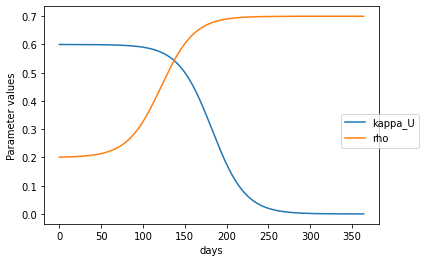

In [0]:
t,Kappa_U_progression= time_dependent_param_dec(365,1,.4,.05,365/2)
t,rho_progression= time_dependent_param_inc(365,.7,.2,.05,365/3)
fig = plt.figure()
l1,l2 = plt.plot(t,Kappa_U_progression,t ,rho_progression )
fig.legend((l1,l2), ('kappa_U','rho'), 'center right')
plt.xlabel('days')
plt.ylabel('Parameter values')
# plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

In [0]:
kappa_I = 0.1
beta = (10)/((.1*5+.9*5)*20*30) 
gamma = 3./(10*30)
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon
kappa_U_params= 1,.4,.05,365/2 #param_max_kappa,param_min_kappa,Growth_rate_kappa,Midpoint_kappa
rho_params= .7,.2,.05,365/3 #param_max_rho,param_min_rho,Growth_rate_rho,Midpoint_rho
kappa_trend= time_dependent_param_dec
rho_trend= time_dependent_param_inc

In [0]:
def ode_FE_td(f_td, U_0, dt, T, ti_params, kappa_U_params, rho_params, kappa_trend, rho_trend):
    """Forward Euler method"""
    N_t = int(round(T/dt))
    param_max_kappa,param_min_kappa,Growth_rate_kappa,Midpoint_kappa=  kappa_U_params
    kappa_U_progression=kappa_trend(T,param_max_kappa,param_min_kappa,Growth_rate_kappa,Midpoint_kappa)
    param_max_rho,param_min_rho,Growth_rate_rho,Midpoint_rho=  rho_params
    rho_progression=rho_trend(T,param_max_rho,param_min_rho,Growth_rate_rho,Midpoint_rho)  
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: np.asarray(f_td(u, t, ti_params, kappa_U_progression, rho_progression))
    u = np.zeros((N_t+1, len(U_0)))
    t = np.linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t

In [0]:
def f_td(u, t, ti_params, kappa_U_progression, rho_progression):
    """Encoding of the SIUR model"""
    beta, gamma, kappa_I, epsilon = ti_params
    kappa_U=kappa_U_progression[t]
    rho=rho_progression[t]
    S, U, I, R = u
    return [-beta*(kappa_I*I + kappa_U*U)*S, (1 - rho - epsilon)*(kappa_I*I + kappa_U*U)*beta*S - gamma*U, (rho + epsilon)*beta*(kappa_I*I + kappa_U*U)*S - gamma*I, gamma*(I + U)]

In [0]:
ode_FE_td(f_td, U_0, dt, D, ti_params, kappa_U_params, rho_params, kappa_trend, rho_trend)

TypeError: ignored